In [15]:
import sys
sys.path.insert(0, '../')
import ccob_qe_analysis as qe
import ccob_utils as u
import os
import glob
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
config = u.load_ccob_config("../ccob_config_MR.yaml")

In [3]:
import ccob_beam as beam

In [4]:
import pickle as pkl
config['tmp_dir']='/home/combet/tmp_MR/60x60/'
ref_raft='R22'
ref_slot='S21'
baffle='on'
#led = b.config['led_name']
led = 'red'
bb = pkl.load(open(config['tmp_dir']+'beam_object_'+ref_raft+'_'+ref_slot+'_'+led+'_'+baffle+'.pkl','rb'))

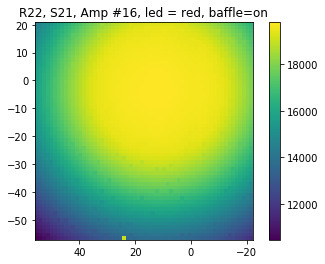

In [5]:
amp=16 # 1-16, select the channel used for the reconstruction

binsize = (max(bb.raw_data['yarr'])-min(bb.raw_data['yarr']))/59
extent = [max(bb.raw_data['xarr'])+binsize/2,
          min(bb.raw_data['xarr'])-binsize/2,
          min(bb.raw_data['yarr'])-binsize/2, 
          max(bb.raw_data['yarr'])+binsize/2]

tmp = np.asarray(bb.raw_data['val'][amp])/np.asarray(bb.raw_data['pd_value']) # correct for the control photodiode value
#tmp = tmp / max(tmp) # normalise to the max

plt.imshow(np.flip(np.reshape(tmp,(60,60), order='F'),axis=1), extent=extent, origin='lower')
plt.title(ref_raft+', '+ref_slot+', Amp #'+str(amp)+', led = '+led+', baffle='+baffle)
plt.colorbar()

In [6]:
bb.interp_beam_BOT(amp=16, pd_corr=True, step=3, use_filt=True)#, xrange=[-10,30], yrange=[-20,20])
interp_image = bb.make_image_BOT(ncols=60, nrows=60)

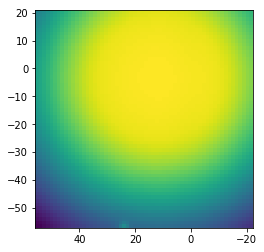

In [7]:
plt.imshow(np.flip(np.reshape(bb.raw_data['filtered'],(60,60), order='F'),axis=1), extent=extent, origin='lower')

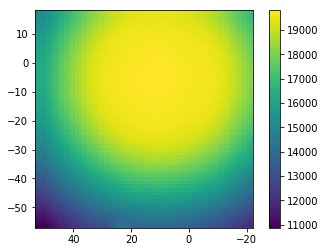

In [8]:
bb.plot_BOT()

In [9]:
ref = np.flip(np.reshape(tmp,(60,60), order='F'),axis=1)
ref_filt = np.flip(np.reshape(bb.raw_data['filtered'], (60,60), order='F'), axis=1)
im = np.flip(bb.beam_image['beam'].T, axis=1)

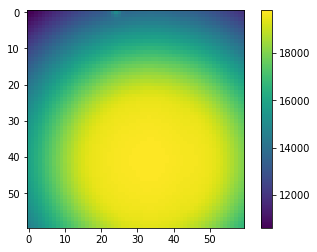

In [10]:
plt.imshow(ref_filt)
plt.colorbar()

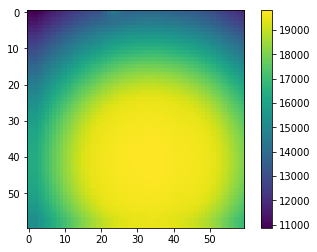

In [11]:
plt.imshow(im)
plt.colorbar()

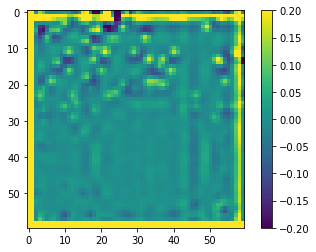

In [11]:
plt.imshow((im-ref_filt)*100/ref_filt, vmin=-0.2, vmax=0.2)
plt.colorbar()

In [12]:
a = np.arange(60)

In [12]:
for step in 1+np.arange(10):
    print(step, a[::step], len(a[::step]))

1 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59] 60
2 [ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48
 50 52 54 56 58] 30
3 [ 0  3  6  9 12 15 18 21 24 27 30 33 36 39 42 45 48 51 54 57] 20
4 [ 0  4  8 12 16 20 24 28 32 36 40 44 48 52 56] 15
5 [ 0  5 10 15 20 25 30 35 40 45 50 55] 12
6 [ 0  6 12 18 24 30 36 42 48 54] 10
7 [ 0  7 14 21 28 35 42 49 56] 9
8 [ 0  8 16 24 32 40 48 56] 8
9 [ 0  9 18 27 36 45 54] 7
10 [ 0 10 20 30 40 50] 6


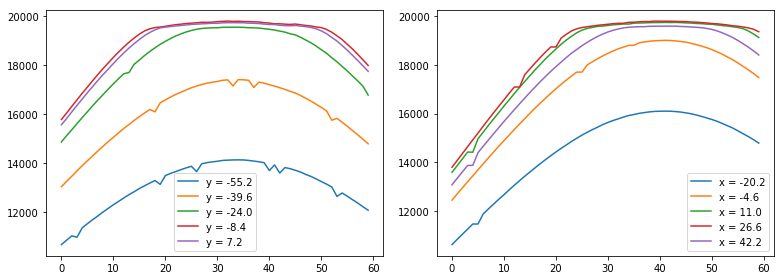

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11,4))
for i in np.arange(1,60,12):
    axes[0].plot(ref[i], '-', label='y = '+str(bb.beam_image['yarr'][i]))
    axes[1].plot(ref.T[i], '-', label='x = '+str(bb.beam_image['xarr'][i]))
    axes[0].legend() 
    axes[1].legend() 
fig.tight_layout()    

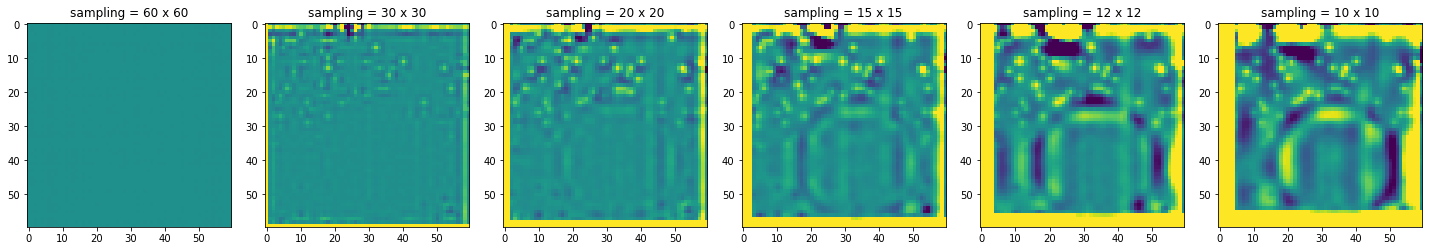

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(20,4))
for i,step in enumerate(1+np.arange(6)):
    bb.interp_beam_BOT(amp=16, pd_corr=True, step=step, use_filt=True)#, xrange=[-10,30], yrange=[-20,20])
    interp_image = bb.make_image_BOT(ncols=60, nrows=60)
    ref = np.flip(np.reshape(tmp,(60,60), order='F'),axis=1)
    ref_filt = np.flip(np.reshape(bb.raw_data['filtered'], (60,60), order='F'), axis=1)
    im = np.flip(bb.beam_image['beam'].T, axis=1)
    axes[i].imshow((im-ref_filt)*100/ref_filt, vmin=-0.2, vmax=0.2)
#    axes[i].imshow((im-ref)*100/ref, vmin=-0.2, vmax=0.2)
#    axes[i].imshow((ref_filt-ref)*100/ref, vmin=-0.2, vmax=0.2)
    npoints = str(len(a[::step]))
    axes[i].set_title('sampling = %s x %s'%(npoints, npoints))
fig.tight_layout()
#plt.title('Relative difference to high res scan [-0.2, -0.2]%')

In [15]:
from scipy.ndimage.filters import median_filter, gaussian_filter

In [16]:
out = median_filter(ref, size=(5,5), mode = 'nearest')

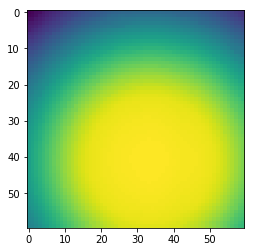

In [17]:
plt.imshow(out)

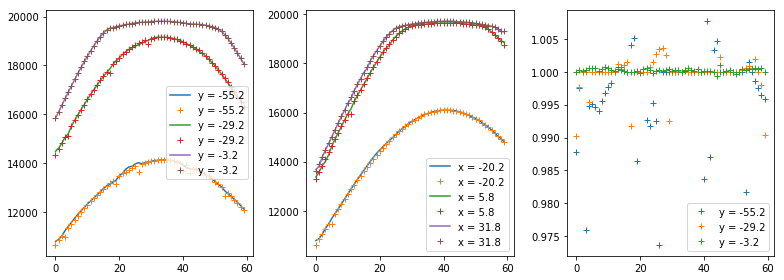

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(11,4))
for i in np.arange(1,60,20):
    axes[0].plot(out[i], '-', label='y = '+str(bb.beam_image['yarr'][i]))
    axes[0].plot(ref[i], '+', label='y = '+str(bb.beam_image['yarr'][i]))
    axes[1].plot(out.T[i], '-', label='x = '+str(bb.beam_image['xarr'][i]))
    axes[1].plot(ref.T[i], '+', label='x = '+str(bb.beam_image['xarr'][i]))
    axes[2].plot(ref[i]/out[i], '+', label='y = '+str(bb.beam_image['yarr'][i]))
    axes[0].legend() 
    axes[1].legend()
    axes[2].legend()
fig.tight_layout()    

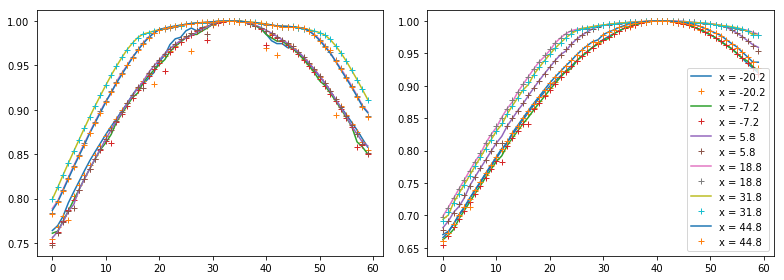

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11,4))
for i in np.arange(1,60,10):
    axes[0].plot(out[i]/max(out[i]), '-', label='y = '+str(bb.beam_image['yarr'][i]))
    axes[0].plot(ref[i]/max(ref[i]), '+', label='y = '+str(bb.beam_image['yarr'][i]))
    axes[1].plot(out.T[i]/max(out.T[i]), '-', label='x = '+str(bb.beam_image['xarr'][i]))
    axes[1].plot(ref.T[i]/max(ref.T[i]), '+', label='x = '+str(bb.beam_image['xarr'][i]))
#    axes[0].legend() 
    axes[1].legend() 
fig.tight_layout()    

In [26]:
a = [1,2,3,4,5,6,7,8]
b = np.reshape(a, (4,2))

In [32]:
b[0,0]

1

In [52]:
b.flatten()

array([1, 2, 3, 4, 5, 6, 7, 8])

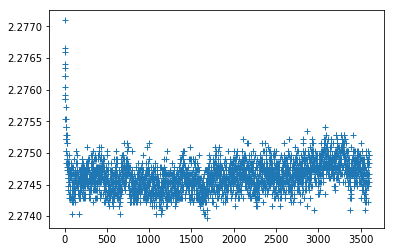

In [20]:
plt.plot(bb.raw_data['pd_value'], '+')

(28.94670607671704, 31.021684074118486)

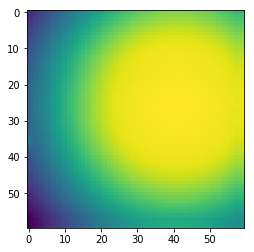

In [23]:
plt.imshow(bb.beam_image['beam']) 
scipy.ndimage.measurements.center_of_mass(bb.beam_image['beam'])

In [24]:
bb.find_max()

In [25]:
print(bb.properties['max_xccob'],bb.properties['max_xarg'],bb.properties['max_yccob'],bb.properties['max_yarg'])

31.800000000000004 41 -22.699999999999996 26
